In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sin_with_noise(x, std=0, **kwargs):
    return np.sin(x) + np.random.randn(*x.shape) * std

def parabola_with_noise(x, a, b, c, std=0):
    return a * x**2 + b * x + c + np.random.randn(*x.shape) * std

def sqrt_abs_with_noise(x, std=0, **kwargs):
    return np.sqrt(np.abs(x)) + np.random.randn(*x.shape) * std

In [3]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [4]:
list_of_functions = [sin_with_noise, parabola_with_noise, sqrt_abs_with_noise]

In [5]:
a = 0.1
b = 0.5
c = 0.1
std = 0.2
N = 100
x_min = -2*np.pi
x_max = 2*np.pi

In [6]:
# основной набор
X = np.linspace(x_min, x_max, N)
# расширенный набор, для проверки поведения за пределами основного набора
X_with_tails = np.linspace(x_min*2, x_max*2, N)

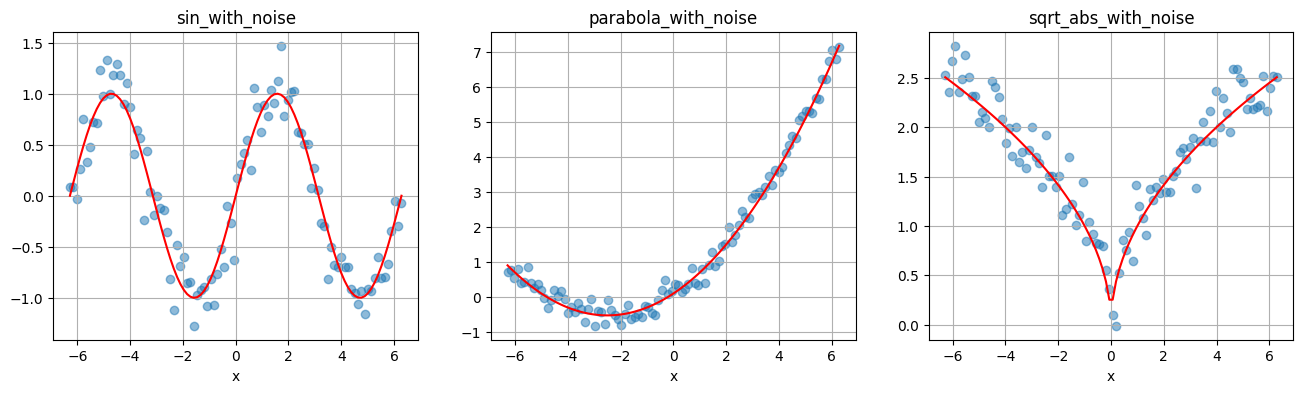

In [7]:
data = []
_, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
bare_data_errors = []
for ax, func in zip(axs, list_of_functions):
  y_noise = func(x=X, a=a, b=b, c=c, std=std)
  y_clean = func(x=X, a=a, b=b, c=c, std=0)
  y_clean_with_tails = func(x=X_with_tails, a=a, b=b, c=c, std=0)
  data.append({"X": X,
               "X_with_tails": X_with_tails,
               "y_clean": y_clean,
               "y_clean_with_tails": y_clean_with_tails,
               "y_noise": y_noise,
               "name": func.__name__})
  for metric in [rmse, mean_absolute_percentage_error]:
    bare_data_errors.append({"name": func.__name__,
                             "metric": metric.__name__,
                             "value": metric(y_true=y_clean_with_tails, y_pred=y_noise)})

  ax.scatter(X, y_noise, alpha=0.5)
  ax.plot(X, y_clean, c="red")
  ax.set_title(func.__name__)
  ax.set_xlabel("x")
  ax.grid(True)

In [8]:
pd.DataFrame(bare_data_errors).pivot(index='name', columns='metric', values='value')

metric,mean_absolute_percentage_error,rmse
name,,
parabola_with_noise,9.940885e-01,5.674195
sin_with_noise,3.115174e+12,1.023421
sqrt_abs_with_noise,2.790734e-01,0.725864


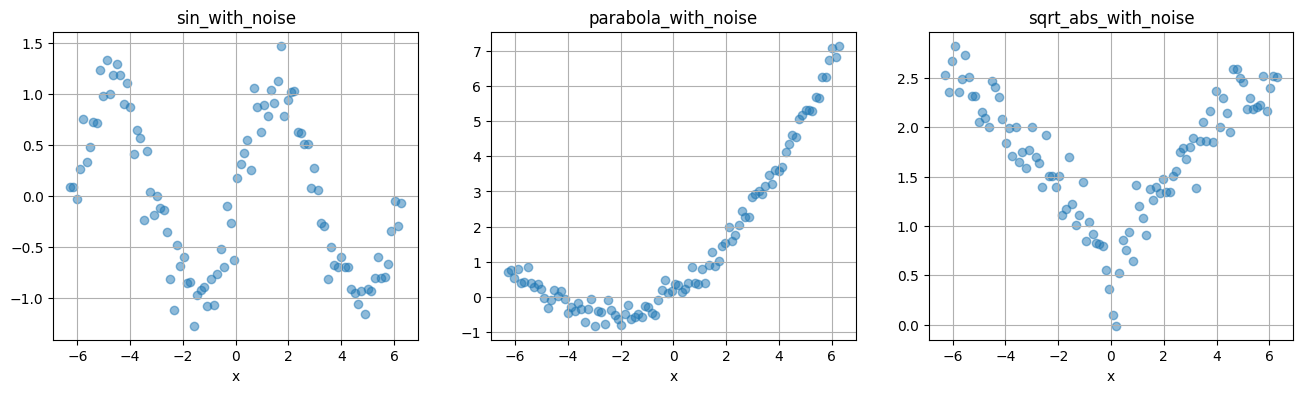

In [9]:
_, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
for ax, item in zip(axs, data):
  ax.scatter(item["X"], item["y_noise"], alpha=0.5)
  ax.set_title(item["name"])
  ax.set_xlabel("x")
  ax.grid()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

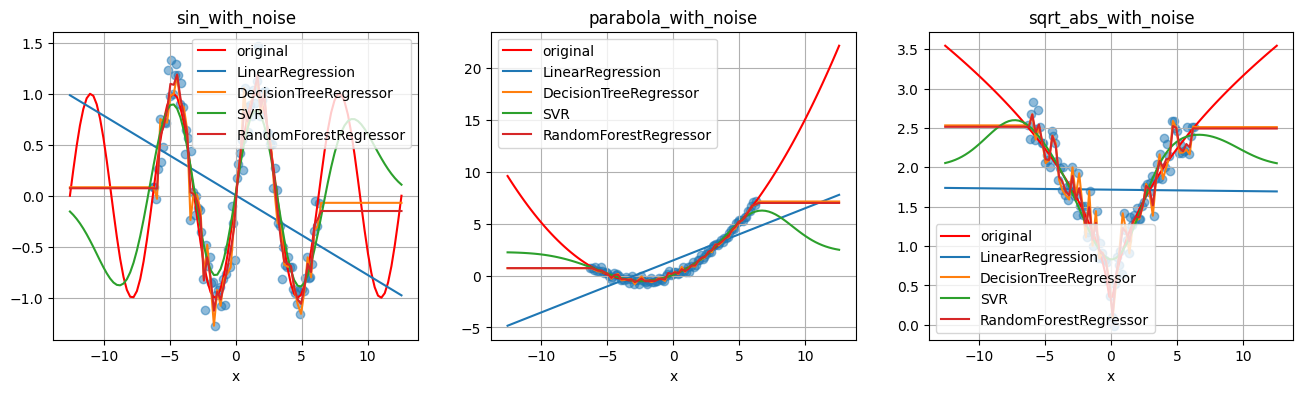

In [11]:
from matplotlib import numpy
_, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
errors = []
for ax, item in zip(axs, data):

  ax.scatter(item["X"], item["y_noise"], alpha=0.5)
  ax.set_title(item["name"])
  ax.set_xlabel("x")
  ax.grid()

  ax.plot(item["X_with_tails"], item["y_clean_with_tails"], label="original", c="red")

  for regressor in [LinearRegression, DecisionTreeRegressor, SVR, RandomForestRegressor]:
    reg = regressor()
    reg = reg.fit(item['X'].reshape(-1, 1), item["y_noise"])
    y_pred = reg.predict(item['X'].reshape(-1, 1))
    for y_true_name in ["noise", "clean"]:
      y_true = item[f"y_{y_true_name}"]

      for metric in [rmse, mean_absolute_percentage_error]:
        errors.append({"data": item["name"],
                       "regressor": regressor.__name__,
                       "comparator": y_true_name,
                       "metric":metric.__name__,
                       "value": metric(y_true=y_true,
                                       y_pred=y_pred)
                      })

    y_pred_with_tails = reg.predict(item["X_with_tails"].reshape(-1, 1))
    ax.plot(item["X_with_tails"], y_pred_with_tails, label=regressor.__name__)

  ax.legend()

In [12]:
pd.DataFrame(errors).pivot(index=['data', 'regressor'], columns=['comparator', 'metric'], values=['value'])

value   
comparator                                    noise   
metric                                         rmse   
data                regressor                         
parabola_with_noise DecisionTreeRegressor  0.000000  \
                    LinearRegression       1.227794   
                    RandomForestRegressor  0.088413   
                    SVR                    0.266109   
sin_with_noise      DecisionTreeRegressor  0.000000   
                    LinearRegression       0.698958   
                    RandomForestRegressor  0.094611   
                    SVR                    0.249006   
sqrt_abs_with_noise DecisionTreeRegressor  0.000000   
                    LinearRegression       0.629571   
                    RandomForestRegressor  0.083668   
                    SVR                    0.222588   

                                                                           
comparator                                                                 
metric                                    mean_absolute_percentage_error   
data                regressor                                              
parabola_with_noise DecisionTreeRegressor                       0.000000  \
                    LinearRegression                            2.950452   
                    RandomForestRegressor                       0.245942   
                    SVR                                         0.560426   
sin_with_noise      DecisionTreeRegressor                       0.000000   
                    LinearRegression                            2.635266   
                    RandomForestRegressor                       0.595951   
                    SVR                                         1.053236   
sqrt_abs_with_noise DecisionTreeRegressor                       0.000000   
                    LinearRegression                            2.037337   
                    RandomForestRegressor                       0.147153   
                    SVR                                         0.910313   

                                                      
comparator                                    clean   
metric                                         rmse   
data                regressor                         
parabola_with_noise DecisionTreeRegressor  0.213029  \
                    LinearRegression       1.201234   
                    RandomForestRegressor  0.158998   
                    SVR                    0.179055   
sin_with_noise      DecisionTreeRegressor  0.200715   
                    LinearRegression       0.649975   
                    RandomForestRegressor  0.137671   
                    SVR                    0.132739   
sqrt_abs_with_noise DecisionTreeRegressor  0.193010   
                    LinearRegression       0.593793   
                    RandomForestRegressor  0.140875   
                    SVR                    0.130345   

                                                                          
comparator                                                                
metric                                    mean_absolute_percentage_error  
data                regressor                                             
parabola_with_noise DecisionTreeRegressor                   7.984963e-01  
                    LinearRegression                        5.023304e+00  
                    RandomForestRegressor                   7.551570e-01  
                    SVR                                     2.112344e-01  
sin_with_noise      DecisionTreeRegressor                   6.230348e+12  
                    LinearRegression                        4.002496e+13  
                    RandomForestRegressor                   9.099515e+12  
                    SVR                                     2.416045e+13  
sqrt_abs_with_noise DecisionTreeRegressor                   1.158345e-01  
                    LinearRegression                        5.075147e-01  
                 

In [13]:
X_sin, y_sin =  data[0]["X"], data[0]["y_noise"]

Text(0.5, 1.0, 'DecisionTreeRegressor')

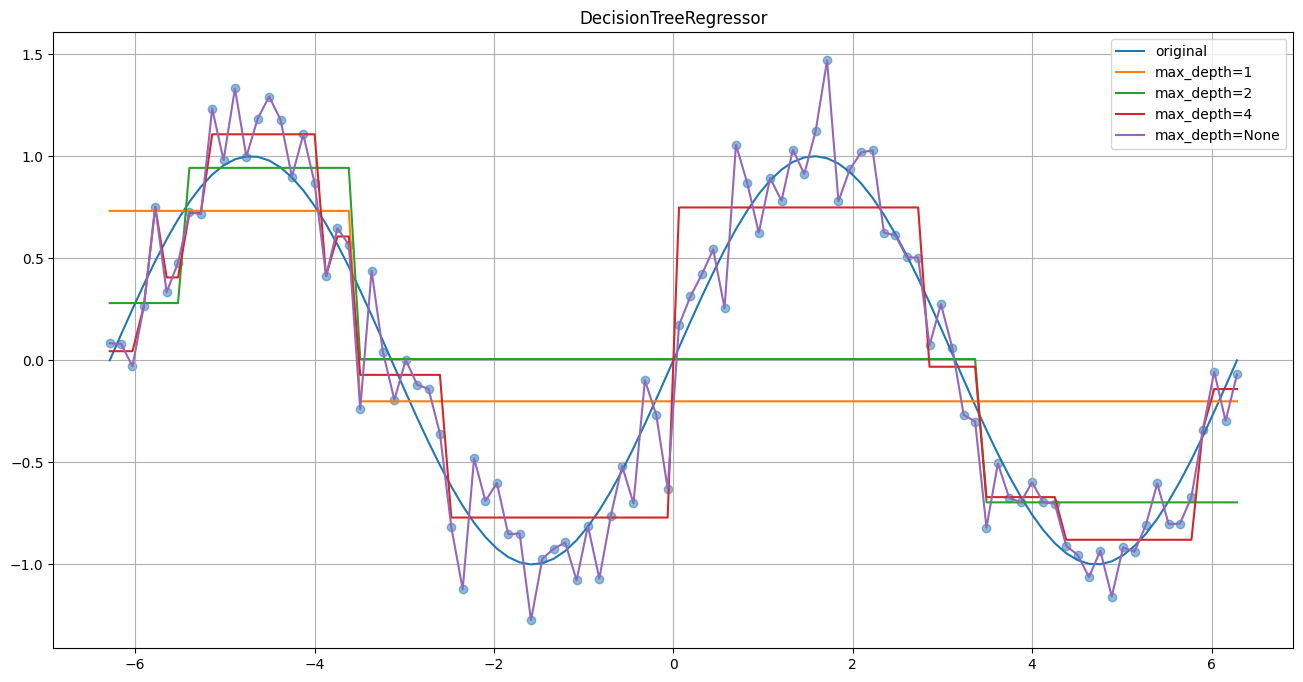

In [14]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))
ax.scatter(X_sin, y_sin, alpha=0.5)
ax.plot(X_sin, sin_with_noise(x=X_sin, a=a, b=b, c=c, std=0), label="original")
for max_depth in [1, 2, 4, None]:
  reg = DecisionTreeRegressor(max_depth=max_depth)
  reg = reg.fit(item['X'].reshape(-1, 1), y_sin)
  y_pred = reg.predict(item['X'].reshape(-1, 1))
  ax.plot(X_sin, y_pred, label=f"max_depth={max_depth}")
ax.legend()
ax.grid()
ax.set_title("DecisionTreeRegressor")

Text(0.5, 1.0, 'SVR')

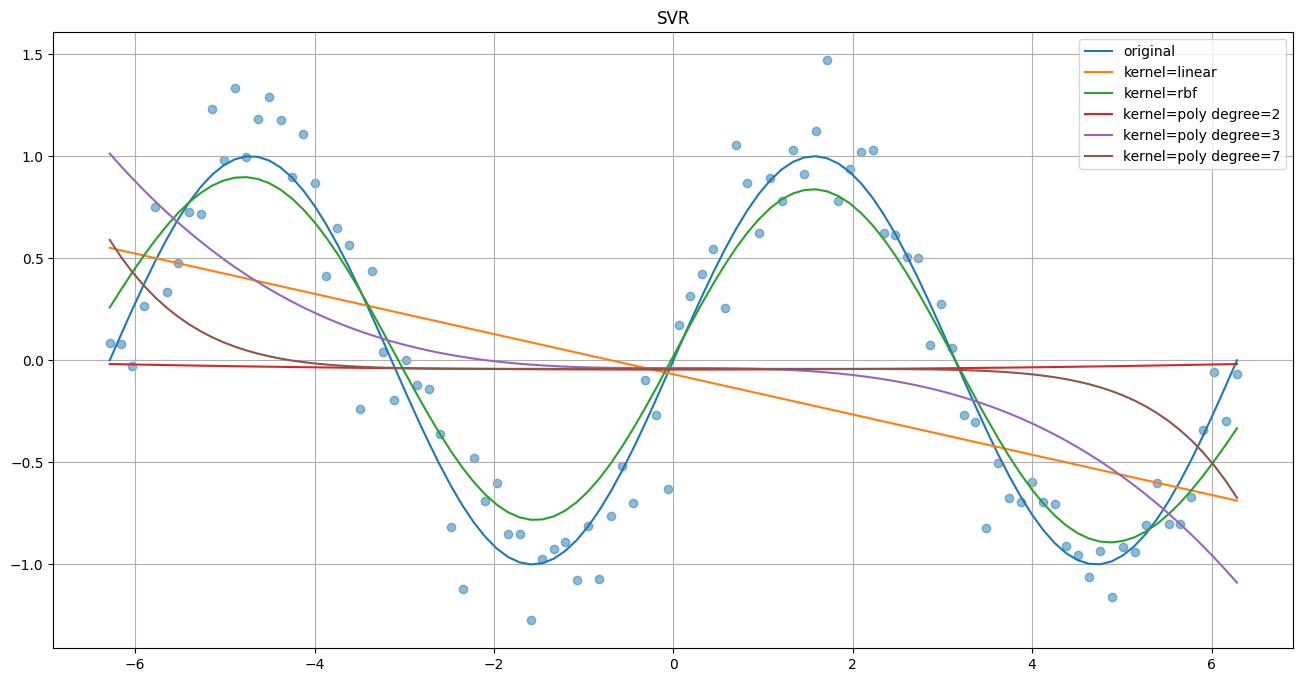

In [15]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))
ax.scatter(X_sin, y_sin, alpha=0.5)
ax.plot(X_sin, sin_with_noise(x=X_sin, a=a, b=b, c=c, std=0), label="original")
for kernel in ["linear", "rbf"]:
  reg = SVR(kernel=kernel)
  reg = reg.fit(item['X'].reshape(-1, 1), y_sin)
  y_pred = reg.predict(item['X'].reshape(-1, 1))
  ax.plot(X_sin, y_pred, label=f"kernel={kernel}")

for degree in [2, 3, 7]:
  reg = SVR(kernel="poly", degree=degree)
  reg = reg.fit(item['X'].reshape(-1, 1), y_sin)
  y_pred = reg.predict(item['X'].reshape(-1, 1))
  ax.plot(X_sin, y_pred, label=f"kernel=poly degree={degree}")

ax.legend()
ax.grid()
ax.set_title("SVR")

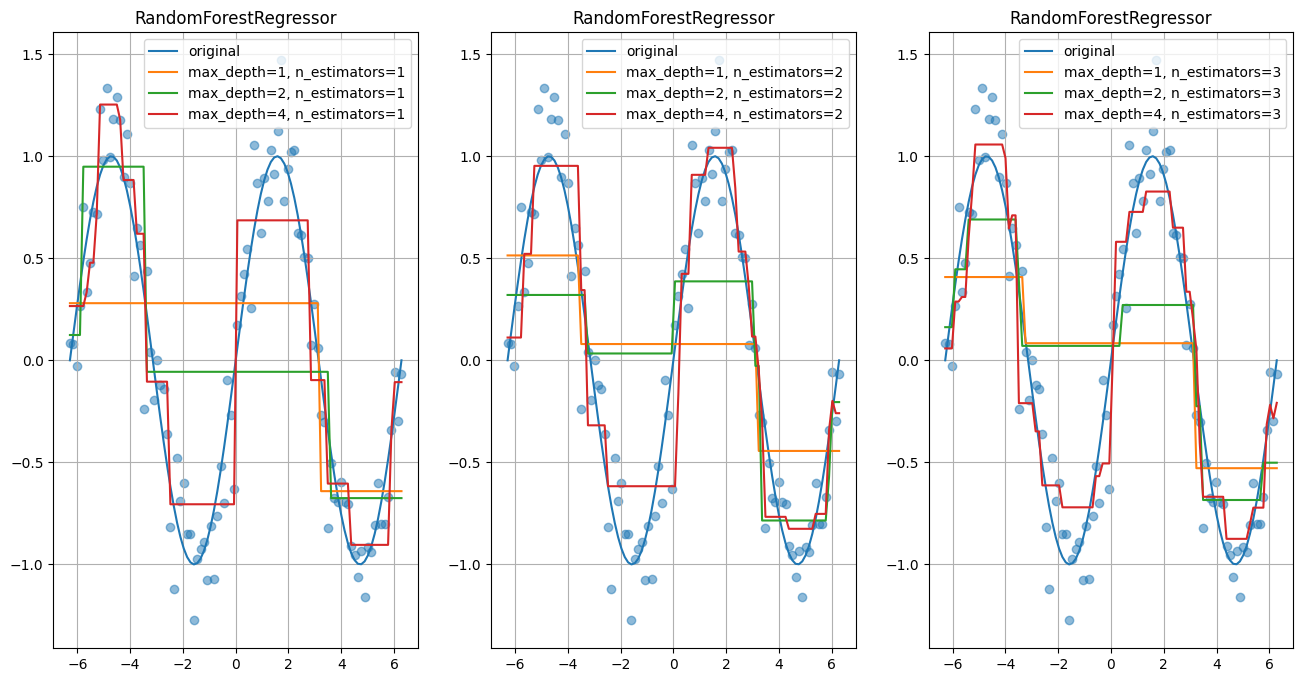

In [16]:
_, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 8))

for ax, n_estimators in zip(axs, [1, 2, 3]):
  ax.scatter(X_sin, y_sin, alpha=0.5)
  ax.plot(X_sin, sin_with_noise(x=X_sin, a=a, b=b, c=c, std=0), label="original")
  for max_depth in [1, 2, 4]:
    reg = RandomForestRegressor(max_depth=max_depth,n_estimators=n_estimators)
    reg = reg.fit(item['X'].reshape(-1, 1), y_sin)
    y_pred = reg.predict(item['X'].reshape(-1, 1))
    ax.plot(X_sin, y_pred, label=f"max_depth={max_depth}, n_estimators={n_estimators}")
  ax.legend()
  ax.grid()
  ax.set_title('RandomForestRegressor')

C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimiza

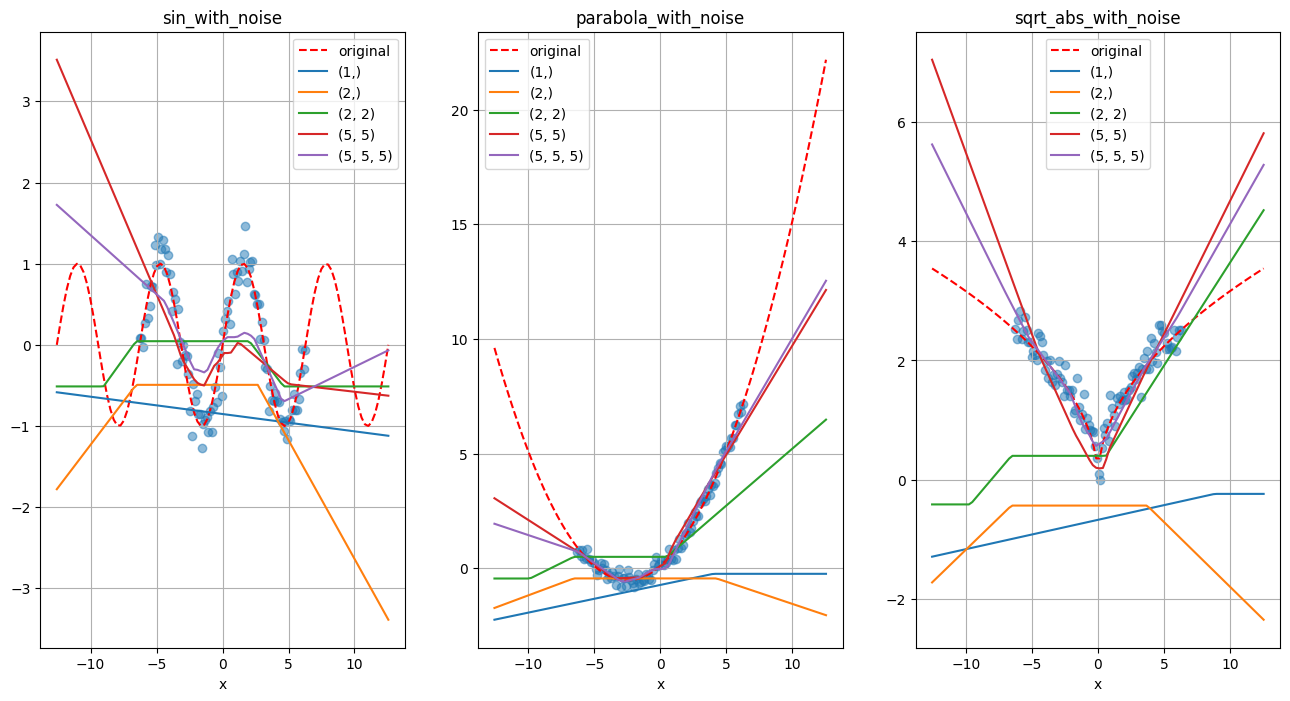

In [17]:
_, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 8))
errors = []
for i, item in enumerate(data):
  ax = axs[i]

  ax.scatter(item["X"], item["y_noise"], alpha=0.5)
  ax.set_title(item["name"])
  ax.set_xlabel("x")
  ax.grid()

  ax.plot(item["X_with_tails"], item["y_clean_with_tails"],"--", label="original", c="red")

  for hidden_layer_sizes in [(1,), (2,), (2, 2), (5, 5), (5, 5, 5)]:
    reg = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=hidden_layer_sizes)
    reg = reg.fit(item["X"].reshape(-1, 1), item["y_noise"])
    y_pred = reg.predict(item["X"].reshape(-1, 1))

    for y_true_name in ["noise", "clean"]:
      y_true = item[f"y_{y_true_name}"]

      for metric in [rmse, mean_absolute_percentage_error]:
        errors.append({"data": item["name"],
                       "regressor": "MLPRegressor",
                       "comparator": y_true_name,
                       "metric": metric.__name__,
                       "value": metric(y_true=y_true,
                                       y_pred=y_pred),
                       "hidden_layer_sizes": hidden_layer_sizes
                      })

    y_pred_with_tails = reg.predict(item["X_with_tails"].reshape(-1, 1))
    ax.plot(item["X_with_tails"], y_pred_with_tails, label=f"{hidden_layer_sizes}")

  ax.legend()

In [18]:
pd.DataFrame(errors).pivot(index=['data', 'hidden_layer_sizes'], columns=['comparator', 'metric'], values=['value'])

value   
comparator                                 noise   
metric                                      rmse   
data                hidden_layer_sizes             
parabola_with_noise (1,)                2.941968  \
                    (2,)                3.006262   
                    (2, 2)              1.353974   
                    (5, 5)              0.373263   
                    (5, 5, 5)           0.301940   
sin_with_noise      (1,)                1.124948   
                    (2,)                0.942418   
                    (2, 2)              0.682582   
                    (5, 5)              0.587869   
                    (5, 5, 5)           0.516628   
sqrt_abs_with_noise (1,)                2.481679   
                    (2,)                2.319373   
                    (2, 2)              1.093153   
                    (5, 5)              0.411675   
                    (5, 5, 5)           0.238226   

                                                                        
comparator                                                              
metric                                 mean_absolute_percentage_error   
data                hidden_layer_sizes                                  
parabola_with_noise (1,)                                     3.867951  \
                    (2,)                                     1.894037   
                    (2, 2)                                   1.820544   
                    (5, 5)                                   0.585879   
                    (5, 5, 5)                                0.584780   
sin_with_noise      (1,)                                     6.911810   
                    (2,)                                     4.895336   
                    (2, 2)                                   1.269741   
                    (5, 5)                                   2.587413   
                    (5, 5, 5)                                1.258624   
sqrt_abs_with_noise (1,)                                     2.073336   
                    (2,)                                     1.716230   
                    (2, 2)                                   0.881409   
                    (5, 5)                                   0.428283   
                    (5, 5, 5)                                0.706665   

                                                   
comparator                                 clean   
metric                                      rmse   
data                hidden_layer_sizes             
parabola_with_noise (1,)                2.898079  \
                    (2,)                2.965608   
                    (2, 2)              1.319429   
                    (5, 5)              0.326799   
                    (5, 5, 5)           0.250346   
sin_with_noise      (1,)                1.088663   
                    (2,)                0.903276   
                    (2, 2)              0.629729   
                    (5, 5)              0.526380   
                    (5, 5, 5)           0.452765   
sqrt_abs_with_noise (1,)                2.436630   
                    (2,)                2.275254   
                    (2, 2)              1.041356   
                    (5, 5)              0.360506   
                    (5, 5, 5)           0.141659   

                                                                       
comparator                                                             
metric                                 mean_absolute_percentage_error  
data                hidden_layer_sizes                                 
parabola_with_noise (1,)                                 4.643998e+00  
                    (2,)                                 2.290456e+00  
                    (2, 2)                               2.450955e+00  
                    (5, 5)                               3.390300e-01  
                    (5, 5, 5)                            4.411506e-01  
sin_with_noise      (1,)     

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

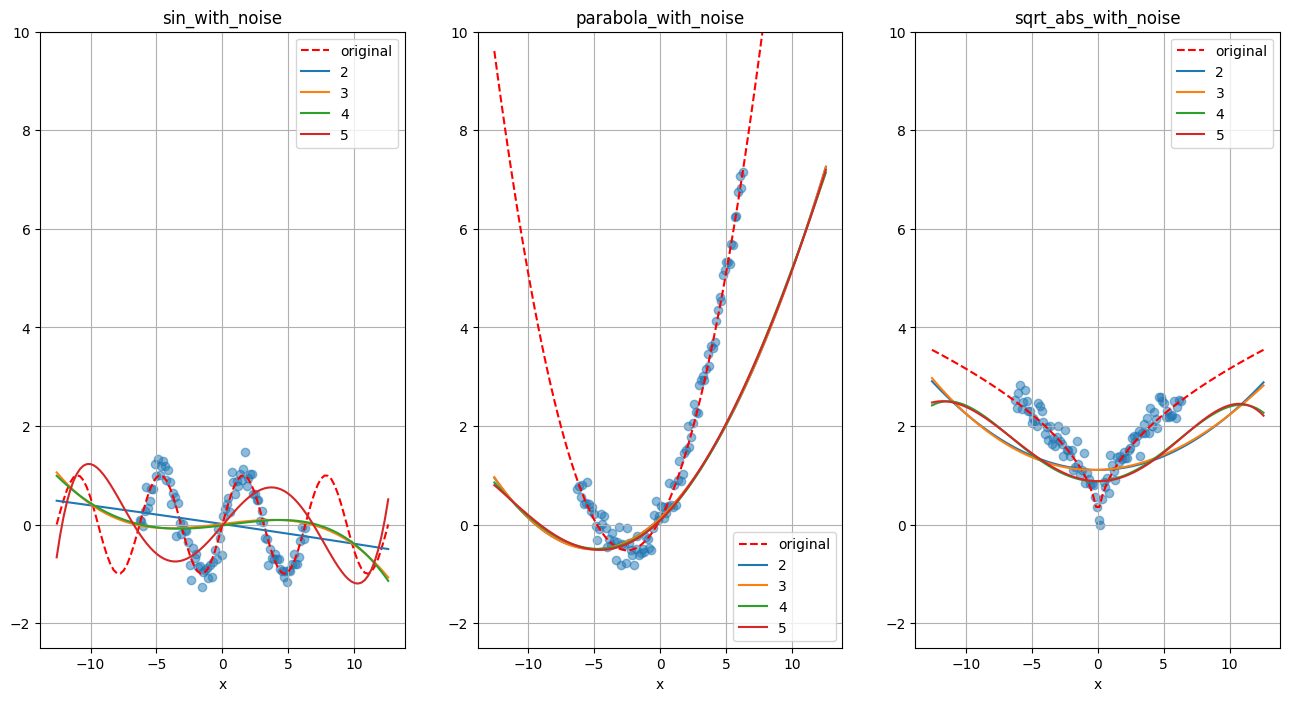

In [20]:
_, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 8))
errors = []
for i, item in enumerate(data):
    ax = axs[i]

    ax.scatter(item["X"], item["y_noise"], alpha=0.5)
    ax.set_title(item["name"])
    ax.set_xlabel("x")
    ax.grid()
    ax.set_ylim((-2.5, 10))

    ax.plot(item["X_with_tails"], item["y_clean_with_tails"], "--", label="original", c="red")

    for degree in [2, 3, 4, 5]:
        reg = Pipeline([('feature_extractor', PolynomialFeatures(degree=degree)),
                        ('reg', LinearRegression())])
        reg = reg.fit(item['X'].reshape(-1, 1), item["y_noise"])
        y_pred = reg.predict(item["X"].reshape(-1, 1))

        for y_true_name in ["noise", "clean"]:
            y_true = item[f"y_{y_true_name}"]

            for metric in [rmse, mean_absolute_percentage_error]:
                errors.append({"data": item["name"],
                               "regressor": regressor.__name__,
                               "comparator": y_true_name,
                               "metric": metric.__name__,
                               "value": metric(y_true=y_true, y_pred=y_pred),
                               "degree": degree
                               })

        y_pred_with_tails = reg.predict(item["X"].reshape(-1, 1))
        ax.plot(item["X_with_tails"], y_pred_with_tails, label=f"{degree}")

    ax.legend()

                                                  mean_test_score
params                                                           
((poly__degree, 1), (reg__fit_intercept, False))         0.999520
((poly__degree, 1), (reg__fit_intercept, True))          0.999483
((poly__degree, 2), (reg__fit_intercept, False))         0.999504
((poly__degree, 2), (reg__fit_intercept, True))          0.999485
((poly__degree, 3), (reg__fit_intercept, False))         0.999498
((poly__degree, 3), (reg__fit_intercept, True))          0.999480


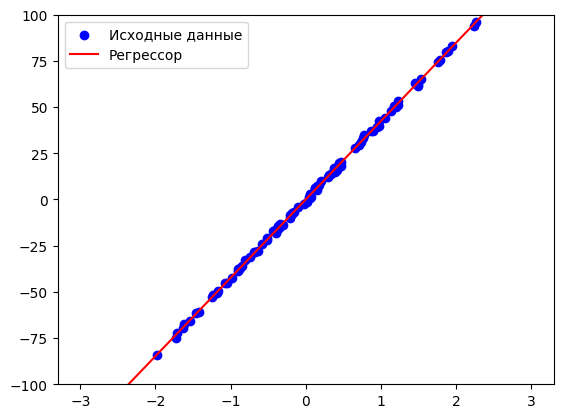

In [27]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Генерирование данных
X, y = make_regression(n_samples=100, n_features=1, noise=0.8, random_state=0)

# Создание конвейера 
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('reg', LinearRegression())
])

# Определение сетки параметров для перебора
param_grid = {
    'poly__degree': [1, 2, 3],
    'reg__fit_intercept': [True, False]
}

# Поиск лучших параметров с помощью GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Обучение модели на данных
grid_search.fit(X, y)

# Получение результатов
results = grid_search.cv_results_
params = results['params']
mean_test_score = results['mean_test_score']

# Вывод таблицы с результатами
dates = pd.pivot_table(pd.DataFrame({"params": [(tuple(d.items())) for d in params], 
                                      "mean_test_score": mean_test_score}), 
                        index=["params"], 
                        values=["mean_test_score"])

print(dates)



# Визуализация результата
X_range = np.linspace(-3, 3, 100)[:, np.newaxis]
y_pred = grid_search.predict(X_range)

plt.scatter(X, y, color='blue', label='Исходные данные')
plt.plot(X_range, y_pred, color='red', label='Регрессор')
plt.ylim([-100, 100])

plt.legend()
plt.show()